<h1 style='color:green' align='center'>
Format of equation :
y = a0 + a1*x + a2*(x^2) + ..... + an*(x^n)
</h1>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import sympy as sp

x = sp.Symbol('x', real=True)

In [2]:
def printMatrix(V,name='A'):
    print(f'Matrix {name} =\n')
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            print(f'{V[i][j]:25.3f}',end='  ')
        print()
    print()


<h2 style = 'color:green'> Finding fitting curve coefficients </h2>

In [3]:
def mulregfit(x,y,degree):
    X_t = []
    y_t = []
    n = len(x)

    X_t.append(n)
    i = 1
    while(True):
        X_t.append(sum((x**i)))
        if(i/2 == degree):
            break
        i += 1   
    
    y_t.append(sum(y))
    for i in range(1,degree+1):        
        y_t.append(sum((x**i)*y))
    
    A = np.zeros((degree+1,degree+1),dtype=float)
    b = np.zeros((degree+1,1),dtype=float)

    for i in range(degree+1):
        k = i
        for j in range(degree+1):
            A[i,j] = X_t[k]
            k +=1
    
    for i in range(degree+1):
        b[i,0] = y_t[i]

    coefficients = np.matmul(np.linalg.inv(A),b)

    return coefficients[:,0],A,b

<h2 style = 'color:green'> Function to tackle ab-normal equations </h2>
this function takes matrix A, b and index of zero coefficient as input and returns modified A and b and coefficients

In [4]:
def finding_A_b_for_non_normal_format(Mat_A,Mat_b,index_of_coefficient_which_is_zero):

    A = np.delete(Mat_A,index_of_coefficient_which_is_zero,axis=0)  # deleting row corresponding to zero coeff from Mat_A

    A = np.delete(A,index_of_coefficient_which_is_zero,axis=1)      # deleting column corresponding to zero coeff from A
    
    b = np.delete(Mat_b,index_of_coefficient_which_is_zero,axis=0)  # deleting row corresponding to zero coeff from Mat_b
    c_s = np.matmul(np.linalg.inv(A),b)
    return A,b,c_s

In [5]:
def y_predict(coefficients_array,x_for_which_y_is_to_be_predicted):
    if isinstance(x_for_which_y_is_to_be_predicted, list):
        ret = []
        n = len(x_for_which_y_is_to_be_predicted)
        for i in range(n):
            temp = 0
            for j in range(len(coefficients_array)):
                temp += coefficients_array[j]*(x_for_which_y_is_to_be_predicted[i]**j)
            ret.append(temp)
        return ret

    else:
        ret = 0
        for j in range(len(coefficients_array)):
            ret += coefficients_array[j]*(x_for_which_y_is_to_be_predicted**j)
        return ret

In [6]:
W = np.array([0.087,0.211,3.02,5.96])
R = np.array([0.296,0.366,2.01,2.40])

In [7]:
X = np.zeros(len(W))
Y = np.zeros(len(R))

for i in range(len(W)):
    X[i] = math.log(W[i])
    Y[i] = math.log(R[i])

In [8]:
print(X)
print(Y)

[-2.44184716 -1.55589715  1.10525683  1.78507048]
[-1.21739582 -1.00512195  0.69813472  0.87546874]


In [9]:
degree = 1         # degreee of fit

p =  4               # to be predicted

In [10]:
coe_s,A,b = mulregfit(X,Y,degree)

In [12]:
coe_s

array([-0.01384831,  0.53595084])

In [13]:
coe_s[0]=math.exp(coe_s[0])

In [14]:
coe_s

array([0.98624714, 0.53595084])

In [15]:
for i in range(len(W)):
    t = coe_s[0]*(W[i]**coe_s[1])
    print(R[i],"\t",t)

0.296 	 0.26645275205629476
0.366 	 0.4283851137838954
2.01 	 1.783388154764392
2.4 	 2.567317828766918


In [11]:
printMatrix(A,'A')
printMatrix(b,'b')

Matrix A =

                    4.000                     -1.107  
                   -1.107                     12.792  

Matrix b =

                   -0.649  
                    6.871  



<h2 style = 'color:green'> Finding coefficients of ab-normal equation </h2>
index ---> index of zero coefficients (can be a list as well)--> e.g. index = 0 means constant term in equation is zero, and so on

In [16]:
index = 1           

In [17]:
A_t,b_t,c_s = finding_A_b_for_non_normal_format(A,b,index)

In [18]:
printMatrix(A_t,"A_Modified")
printMatrix(b_t,"b_Modified")
printMatrix(c_s,"Coefficients")

Matrix A_Modified =

                    4.000                      4.250  
                    4.250                      7.062  

Matrix b_Modified =

                    8.900  
                   10.500  

Matrix Coefficients =

                    1.790  
                    0.410  



<h2 style='color:green'> Original Coefficients</h2>

In [19]:
print(coe_s)

[ 1.59849246 -0.51909548  0.77286432]


In [20]:
y_predicted = y_predict(coe_s,X)
y_predicted

array([2.89045226, 1.59849246, 1.85226131, 2.55879397])

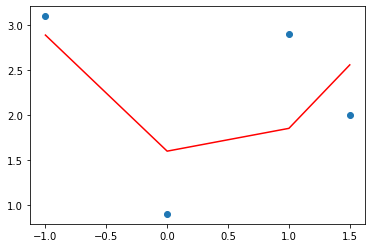

In [21]:
plt.scatter(X,Y,marker='o')
plt.plot(X,y_predicted,color='r')

# Error
## Total Squared Error

In [22]:
total_squared_error = sum((y_predicted-y)**2)
print(total_squared_error)

NameError: name 'y' is not defined

## Mean Squared Error

In [ ]:
mean_squared_error = sum((y_predicted-y)**2)/len(y)
print(mean_squared_error)

In [ ]:
least_square_error = (sum((y-y_predicted)**2))**(1/2)

In [ ]:
least_square_error